In [1]:
using Pkg
Pkg.activate(".")
Pkg.add([
    PackageSpec(name="SimilaritySearch", version="0.8"),
    PackageSpec(name="Plots")
])

using SimilaritySearch, Plots

  Activating project at `~/Research/SimilaritySearchDemos/synthetic`
    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/Research/SimilaritySearchDemos/synthetic/Project.toml`
  No Changes to `~/Research/SimilaritySearchDemos/synthetic/Manifest.toml`


# Creating a 2D dataset
This demonstration shows in a 2D example the functionalify of SearchGraph

In [2]:
n = 100_000

M = randn(Float32, 2, n)
db = MatrixDatabase(M)
size(M)

(2, 100000)

Once the dataset is created, the index should be also created

In [3]:
G = SearchGraph(db=db, dist=SqL2Distance())
push!(G.callbacks, OptimizeParameters(kind=ParetoRecall()))
index!(G)
IJulia.clear_output()

0

## The set of queries
We define a small set of queries being close to the border of the dataset and also in the most dense regions of the dataset. Please note how queries in low and high dense regions are located.

In [7]:
Q = [Float32[-2, -2], Float32[2, -2], Float32[-2, 0], Float32[-0, 2], Float32[0, 0],   Float32[-3, 3],  Float32[4, 4], Float32[1, 0.5]]
I, D = searchbatch(G, Q, 30)

(Int32[15426 63399 … 2819 2249; 4693 57708 … 33347 36693; … ; 81225 96640 … 36955 88951; 75588 47334 … 51395 93656], Float32[0.0009873349 0.0005823011 … 2.4798849 1.1629392f-6; 0.002113992 0.0010663165 … 3.2359939 1.0286908f-5; … ; 0.038485803 0.030231278 … 5.6068106 0.0011047053; 0.03851637 0.0305642 … 5.65048 0.0011145413])

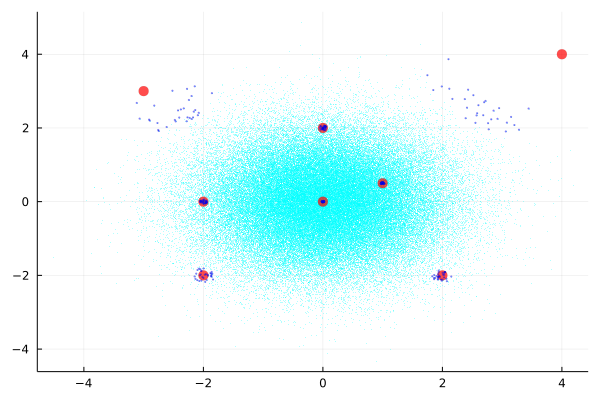

In [12]:
scatter(view(M, 1, :), view(M, 2, :), fmt=:png, c=:cyan, ma=0.3, a=0.3, ms=1, markerstrokewidth=0)

scatter!(getindex.(Q, 1), getindex.(Q, 2), c=:red, ma=0.7, a=0.7, ms=6, markerstrokewidth=0, legend=nothing)

for c in eachcol(I)
    X = M[:, c]
    scatter!(view(X, 1, :), view(X, 2, :), c=:blue, ma=0.5, a=0.5, ms=2, markerstrokewidth=0)
    #scatter!( c=:auto, ms=2)
end

plot!()
#scatter!(getindex.(Q, 1), getindex.(Q, 2), c=:red, ma=0.7, a=0.7, ms=4, markerstrokewidth=0, legend=nothing)

Low dense regiones are correctly considered

# Distribution of distances for the set of queries.

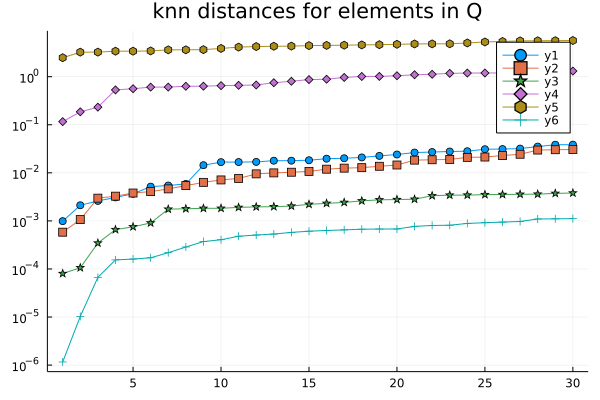

In [6]:
plot(D, m=:auto, yscale=:log10, title="knn distances for elements in Q")